In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
import likelihood
import pandas as pd
import numpy as np

### Example model and data

Models should have the form:
```
def some_model(param1,param2,param3,...other_args,...other_kwargs):
    return observable
```

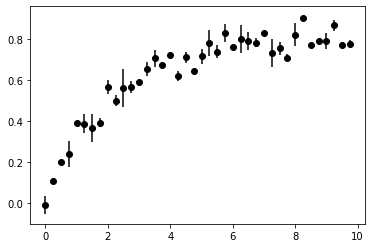

,X,Y,Y_stdev,residual,weighted_residual
0,0.00,-0.009193,-0.042647,-0.009193,0.215563
1,0.25,0.110881,-0.012945,-0.000230,0.017739
2,0.50,0.200981,-0.008898,0.000981,-0.110295
3,0.75,0.239530,-0.064917,-0.033197,0.511376
4,1.00,0.389957,0.009626,0.056623,5.882528


In [21]:
def binding_model(K,X):
    """
    Simple, saturating binding curve.

    K: association constant
    X: vector of X concentrations
    """

    return K*X/(1 + K*X)

df = pd.read_csv("binding-curves_noise-0.050.csv",index_col=0)

fig, ax = plt.subplots()
ax.errorbar(df.X,df.Y,yerr=df.Y_stdev,fmt="o",color="black")
plt.show()

df.head()

### Wrap the binding model
Anything except the fit parameters should be passed in via args and kwargs

In [22]:
lm = likelihood.ModelWrapper(binding_model,
                             args=[],
                             kwargs={"X":df.X})

### Construct the fitter and do the fit

In [4]:
f = likelihood.MLFitter()
f.fit(model=lm.observable,guesses=[1.0],y_obs=df.Y,)
print(f.success)
print(f.estimate)

True
[0.50675019]


### Alternate way to construct fitter and do fit

In [35]:
f = likelihood.MLFitter()
f.model = lm.observable
f.guesses = [1.0]
f.y_obs = df.Y
f.fit()
print(f.success)
print(f.estimate)

True
[0.50675019]


### Add weighted residuals

In [36]:
f = likelihood.MLFitter()
f.fit(model=lm.observable,guesses=[1.0],y_obs=df.Y,y_stdev=df.Y_stdev)
print(f.success)
print(f.estimate)

True
[0.44217794]


### Plotting

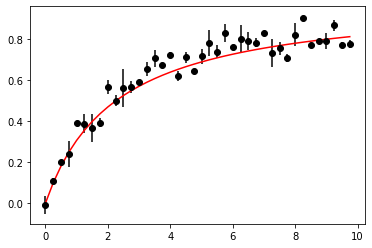

In [17]:
# Plot the fit
fig, ax = plt.subplots()
ax.errorbar(df.X,df.Y,yerr=df.Y_stdev,fmt="o",color="black")
ax.plot(df.X,binding_model(*f.estimate,X=df.X),"-",color='red')

### Corner plot

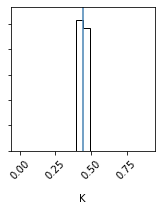

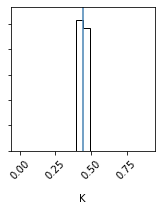

In [33]:
f.corner_plot()

### You can add parameter bounds and names
(These can also be set as arguments in the f.fit() call)


In [45]:
f = likelihood.MLFitter()
f.model = lm.observable
f.guesses = [1.0]
f.y_obs = df.Y
f.y_stdev = df.Y_stdev
f.bounds = [[0],[np.inf]]
f.param_names = ["K"]
f.fit()
print(f.success)
print(f.estimate)

True
[0.44217795]


### Bayesian fitter

In [46]:
f = likelihood.BayesianFitter()
f.fit(model=lm.observable,guesses=[1.0],y_obs=df.Y,y_stdev=df.Y_stdev)
print(f.success)
print(f.estimate)


True
[0.4421583]


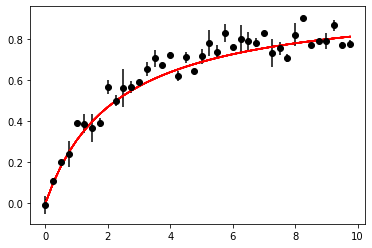

In [47]:
fig, ax = plt.subplots()
ax.errorbar(df.X,df.Y,yerr=df.Y_stdev,fmt="o",color="black")

# Plot 100 fits sampled from posterior
for i in range(0,len(f.samples),90):
    ax.plot(df.X,binding_model(*f.samples[i,:],X=df.X),"-",color='red',alpha=0.1)